# MULTIPLE LINEAR REGRESSION MODEL CREATION

## Model for predicting demand in Shared Bikes

## Problem statement
    
    A bike sharing service provider company would like to analyze the demand for the shared bikes depanding on some       parameters on the day basis. So, a Linear regression model needs to be built from the provided dataset for             answering the following queries.
    
1.Which variables are significant in predicting the demand for shared bikes?

2.How well those variables describe the bike demand?

In [1]:
#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Data understanding & Preparation

In [3]:
#importing dataset
day=pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking the shape of dataframe
day.shape

(730, 16)

In [5]:
#checking the info of dataframe
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#checking the summary of dataframe
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Converting numbered values in season column to their actual season notation since it season is categorical variable

day.loc[(day['season']==1),'season'] ='spring'
day.loc[(day['season']==2),'season'] ='summer'
day.loc[(day['season']==3),'season'] ='fall'
day.loc[(day['season']==4),'season'] ='winter'

print(day.season.unique())
print(day.season.dtype)

['spring' 'summer' 'fall' 'winter']
object


In [8]:
#Converting numbered values in weekday column to their actual weekday notation since it weekday is categorical variable

day.loc[(day['weekday']==0),'weekday'] ='sunday'
day.loc[(day['weekday']==1),'weekday'] ='monday'
day.loc[(day['weekday']==2),'weekday'] ='tuesday'
day.loc[(day['weekday']==3),'weekday'] ='wednesday'
day.loc[(day['weekday']==4),'weekday'] ='thursday'
day.loc[(day['weekday']==5),'weekday'] ='friday'
day.loc[(day['weekday']==6),'weekday'] ='saturday'

print(day.weekday.unique())

['saturday' 'sunday' 'monday' 'tuesday' 'wednesday' 'thursday' 'friday']


In [9]:
#Converting numbered values in weathersit column to their actual notation since it weathersit is categorical variable

day.loc[(day['weathersit']==1),'weathersit'] ='Clear, Few clouds, Partly cloudy, Partly cloudy'
day.loc[(day['weathersit']==2),'weathersit'] ='Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
day.loc[(day['weathersit']==3),'weathersit'] ='Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
day.loc[(day['weathersit']==4),'weathersit'] ='Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'

print(day.weathersit.unique())

['Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
 'Clear, Few clouds, Partly cloudy, Partly cloudy'
 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds']


In [10]:
#since yr only have two values 0 and 1 , the slope makes sense.
day['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [11]:
#since workingday only have two values 0 and 1 , the slope makes sense.
day['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [12]:
#Converting numbered values in weekday column to their actual weekday notation since it weekday is categorical variable

day.loc[(day['weekday']==0),'weekday'] ='sunday'
day.loc[(day['weekday']==1),'weekday'] ='monday'
day.loc[(day['weekday']==2),'weekday'] ='tuesday'
day.loc[(day['weekday']==3),'weekday'] ='wednesday'
day.loc[(day['weekday']==4),'weekday'] ='thursday'
day.loc[(day['weekday']==5),'weekday'] ='friday'
day.loc[(day['weekday']==6),'weekday'] ='saturday'

print(day.weekday.unique())

['saturday' 'sunday' 'monday' 'tuesday' 'wednesday' 'thursday' 'friday']


In [13]:
#converting month to categories
month={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'octo',11:'nov',12:'dec'}
day.mnth=[month[item] for item in day.mnth]
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [15]:
#converting date to dtime format
day['dteday']=day['dteday'].astype('datetime64')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,jan,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,jan,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,jan,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,jan,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,jan,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Visualisation

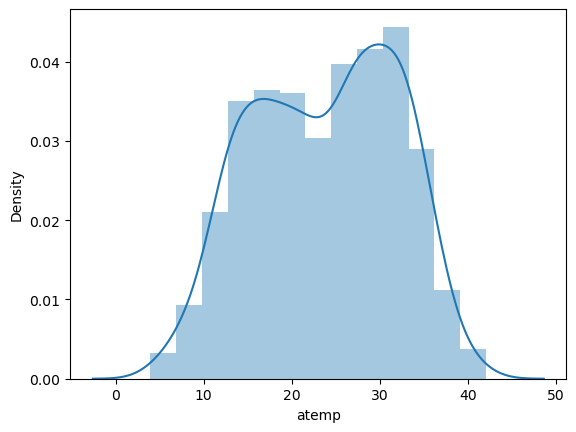

In [16]:
# feel temperature - atemp distribution
sns.distplot(day['atemp'])
plt.show()


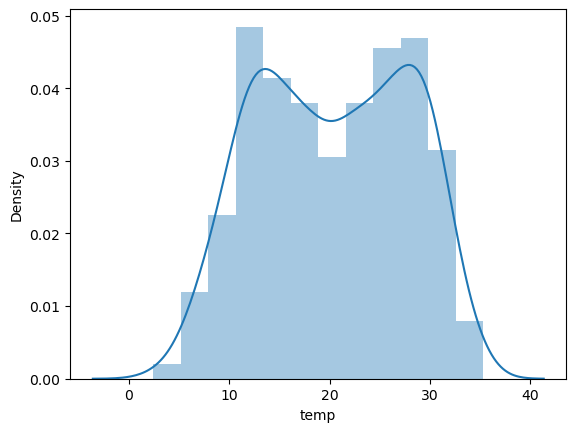

In [17]:
# temperature distribution
sns.distplot(day['temp'])
plt.show()

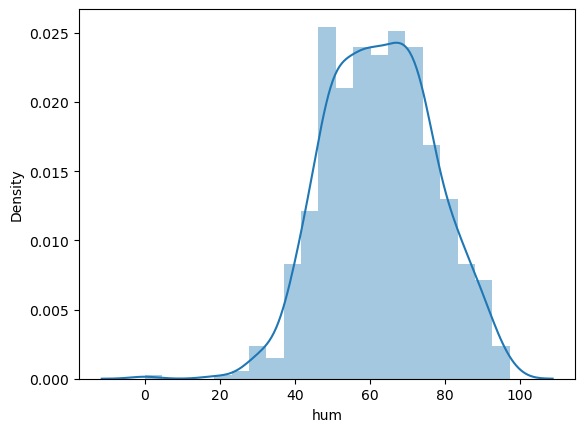

In [18]:
# humidity distribution
sns.distplot(day['hum'])
plt.show()

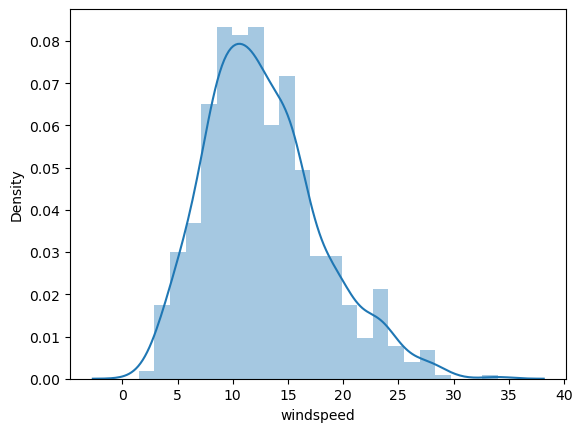

In [19]:
# windspeed distribution
sns.distplot(day['windspeed'])
plt.show()

<AxesSubplot:xlabel='season', ylabel='cnt'>

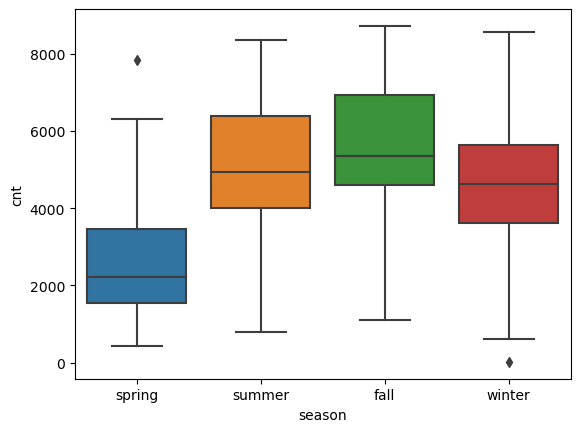

In [20]:
#box plot - categorical variable- season
sns.boxplot(y='cnt',x='season',data=day)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

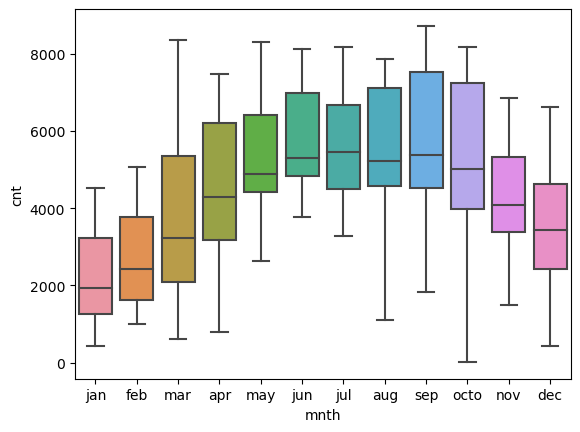

In [21]:
#box plot - categorical variable- month
sns.boxplot(y='cnt',x='mnth',data=day)

(array([0, 1, 2]),
 [Text(0, 0, 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'),
  Text(1, 0, 'Clear, Few clouds, Partly cloudy, Partly cloudy'),
  Text(2, 0, 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds')])

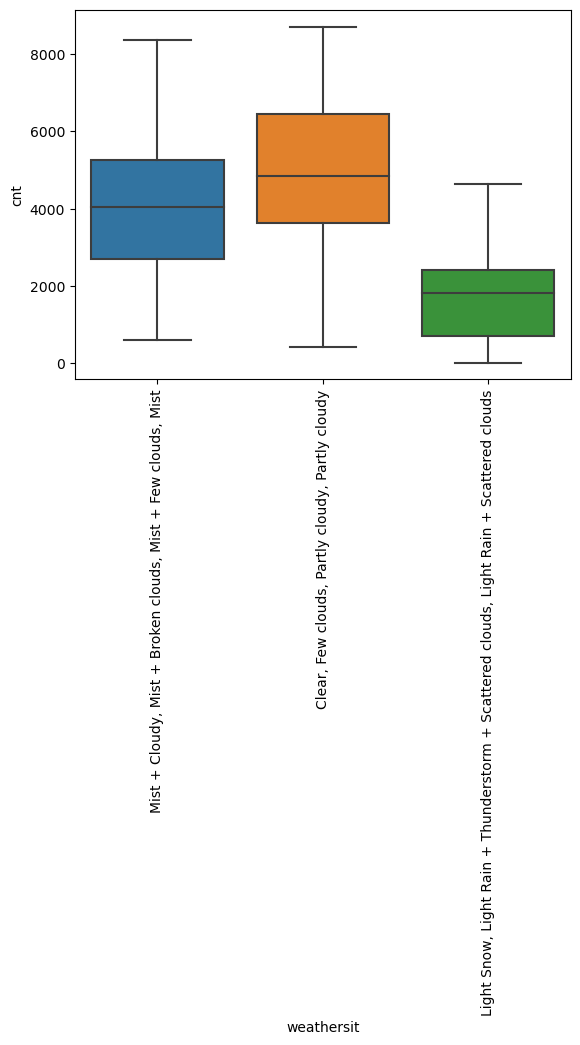

In [22]:
#box plot - categorical variable- weathersit
sns.boxplot(y='cnt',x='weathersit',data=day)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

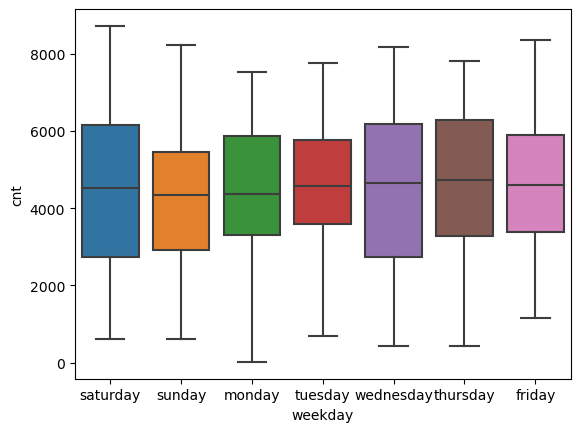

In [23]:
#box plot - categorical variable- weekday
sns.boxplot(y='cnt',x='weekday',data=day)

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

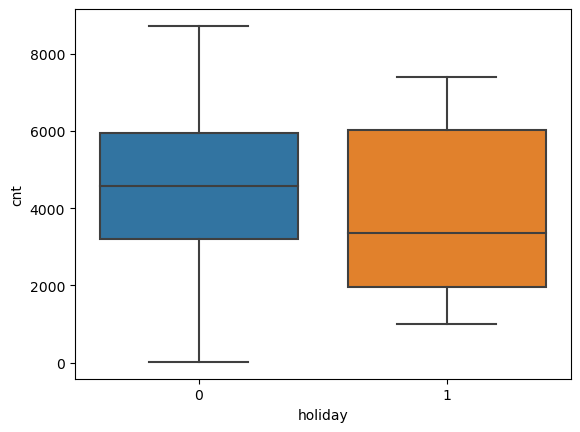

In [24]:
#box plot - holiday
sns.boxplot(y='cnt',x='holiday',data=day)

<AxesSubplot:xlabel='yr', ylabel='cnt'>

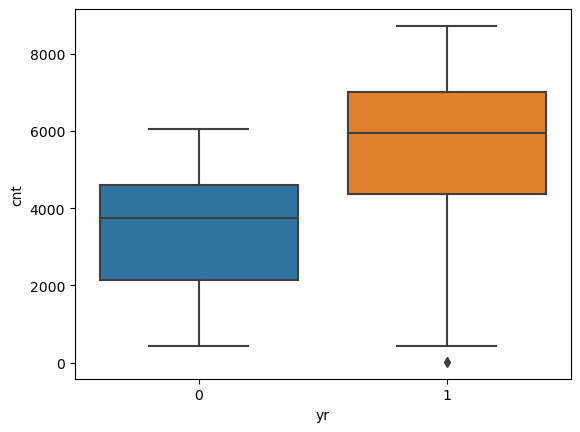

In [25]:
#box plot - year
sns.boxplot(y='cnt',x='yr',data=day)

In [26]:
#subsetting numerical variables for pair plot visualisation
day_num=day.select_dtypes(exclude=['object'])
day_num.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [27]:
#dropping categorical variables and registered and casual columns because they have no contribution to our model
#and removing steday since date ahs no bearing on cnt
day_num.drop(['casual','registered','dteday','instant','yr','workingday','holiday'],axis=1,inplace=True)
day_num.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


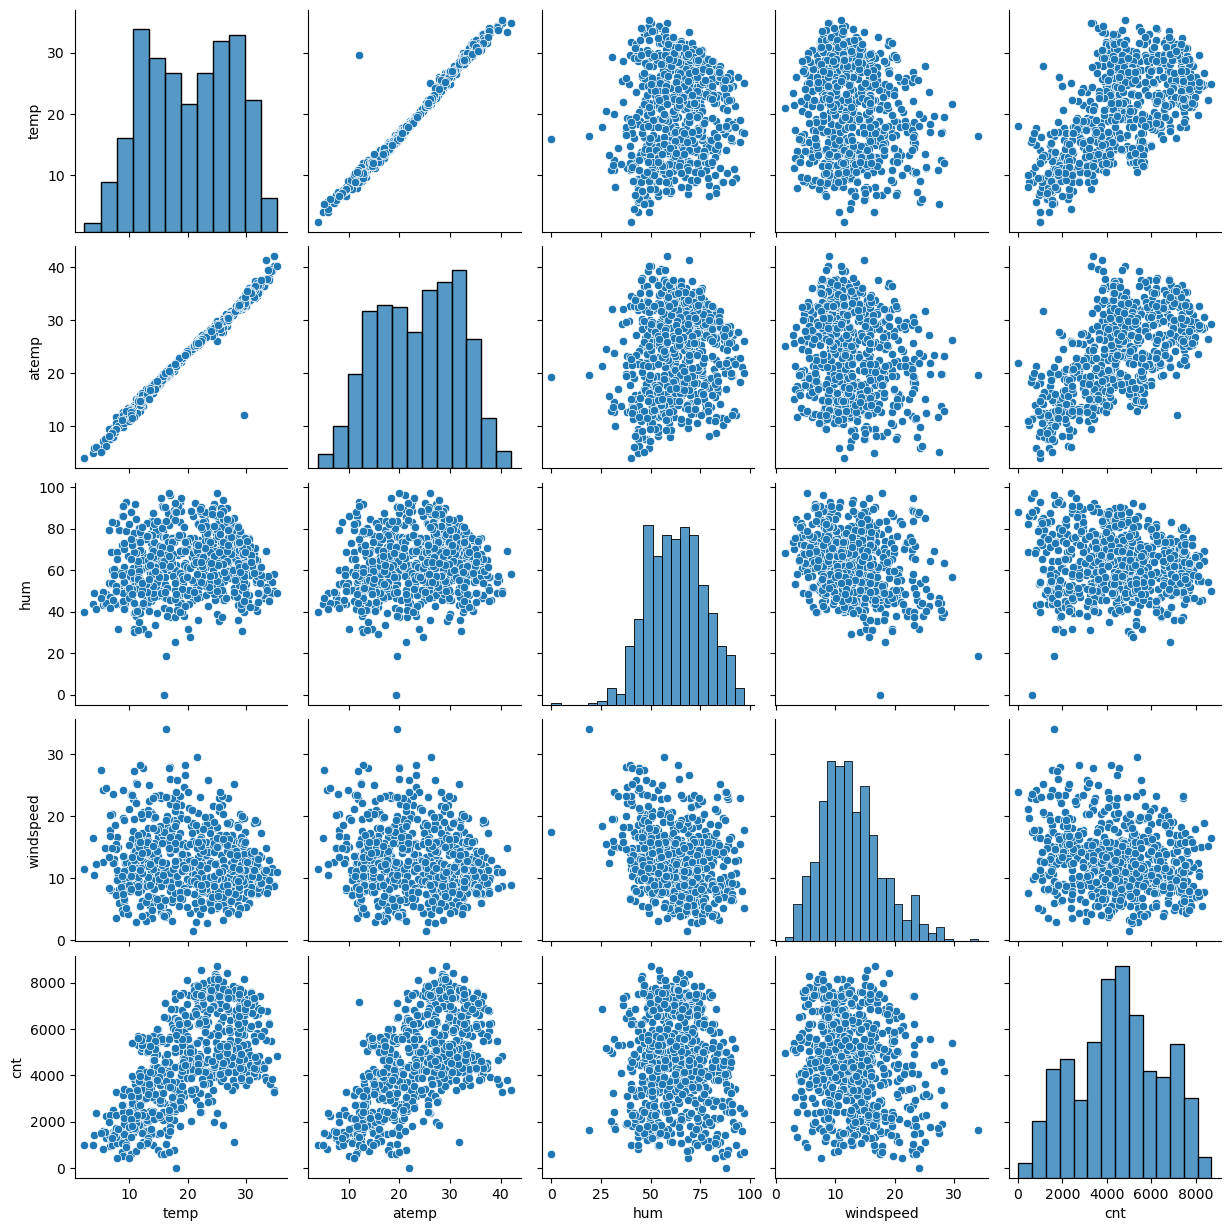

In [28]:
#pairplotting all numerical variables
sns.pairplot(day_num)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

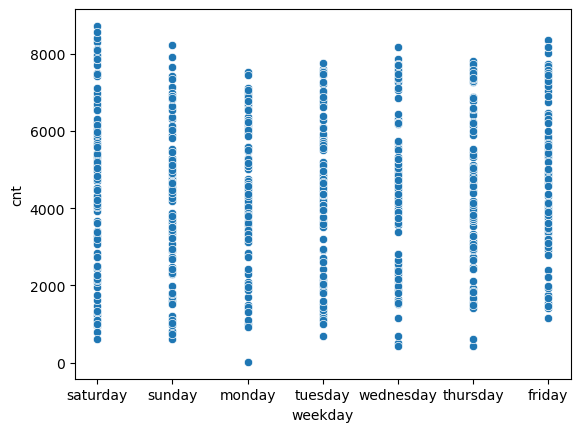

In [29]:
#scatterplotting weekday vs cnt
sns.scatterplot(y='cnt',x='weekday',data=day)

In [30]:
#correlation check
day.corr()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866026,0.016275,-0.004619,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
yr,0.866026,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.016275,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.004619,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
temp,0.150738,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.016080,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.250502,0.054055,-0.517607,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.596911,-0.109142,0.305437,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411


1.count has high correleation with temp and atemp along with year.

2.Instant,casual,registered are ignored since they either have a drirect relation ship with count or has no bearing on  the data.

3.atemp is similar to temp in most cases and has correaltion of 0.99

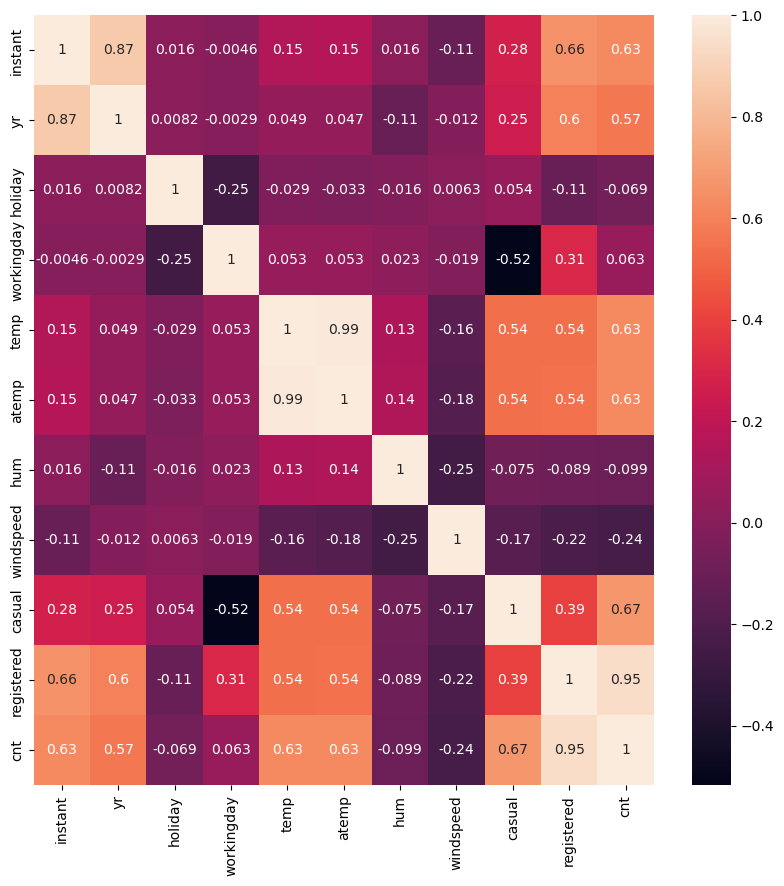

In [31]:
#Visualising correlation
plt.figure(figsize=(10,10))
sns.heatmap(day.corr(),annot=True)
plt.show()

## Data preparation

In [32]:
#atemp has 0.99 correlation with themp so almost all data will be captured by temp itself.
day.drop('atemp',axis=1,inplace=True)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,jan,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,jan,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,jan,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,jan,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,jan,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,82,1518,1600


In [33]:
#dropping registered and casual since they have high correlation with count
day.drop(['casual','registered'],axis=1,inplace=True)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,2018-01-01,spring,0,jan,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985
1,2,2018-02-01,spring,0,jan,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801
2,3,2018-03-01,spring,0,jan,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349
3,4,2018-04-01,spring,0,jan,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562
4,5,2018-05-01,spring,0,jan,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600


In [34]:
#dropping time stamp columns like instant,dteday
day.drop(['instant','dteday'],axis=1,inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600


In [35]:
#listing all categorical variables
day_cat=day.select_dtypes('object')
day_cat.head()

,season,mnth,weekday,weathersit
0,spring,jan,saturday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
1,spring,jan,sunday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
2,spring,jan,monday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
3,spring,jan,tuesday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
4,spring,jan,wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy"


In [36]:
#creating dummie variables
day_dummies=pd.get_dummies(day_cat,drop_first=True)
day_dummies.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth_octo,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
#dropping categorical columns from main dataset
day=day.drop(list(day_cat),axis=1)

In [38]:
#concatenating dummies with main dataset
day=pd.concat([day,day_dummies],axis=1)

In [39]:
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_octo,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Model building 

In [40]:
#splitting into train and test data
from sklearn.model_selection import train_test_split
np.random.seed(0)
day_train,day_test=train_test_split(day,train_size=0.7,test_size=0.3,random_state=100)
day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_octo,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [41]:
#describing
day_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_octo,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,7.431169,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Scaling

In [42]:
day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_octo,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [43]:
#importing libraries
from sklearn.preprocessing import MinMaxScaler

In [44]:
#assigning 
scaler=MinMaxScaler()

In [45]:
#Fitting scaler on to continuous variables of dataset
var=['temp','hum', 'windspeed','cnt']

day_train[var]=scaler.fit_transform(day_train[var])

In [46]:
#assigning independent and dependant variables
y_train=day_train.pop('cnt')
X_train=day_train
#drop(['casual','registered'],axis=1)

In [47]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_octo,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [48]:
#Checking whether proper scaling has been done or not.
day_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_octo,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.243137,0.245098,0.24902,0.096078,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.429398,0.430568,0.43287,0.294988,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
### as an array before proceeding
np.asarray(day_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [50]:
#shape of training data set for building the model
X_train.shape

(510, 28)

## Scaling

## Building the initial model with all variables

This model will be baseline model and will be use for comparison with the models with lesser variables.

In [51]:
#Building an inital model with all parameters
X_train_lm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_lm)



In [52]:
#Fitting model
lm=lr.fit()


In [53]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          8.74e-182
Time:                        07:10:56   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2451      0.035      6.955      0.000       0.176       0.314
yr                                                                                                     0.2321      0.008     28.820      0.000       0.216       0.248
holiday                                                                                                0.0100      0.024      0.415      0.678      -0.037       0.057
workingday                                                                                             0.0969      0.012      7.905      0.000       0.073       0.121
temp                                                                                                   0.4506      0.046      9.734      0.000       0.360       0.542
hum                                                                                                   -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                                                                                             -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring                                                                                         -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer                                                                                          0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter                                                                                          0.1058      0.028      3.794      0.000       0.051       0.161
mnth_aug                                                                                               0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_dec                                                                                              -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_feb                                                                                              -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_jan                                                                                              -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_jul                                                                                              -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_jun                                                                     

## Model building with limited variables (using RFE)

In [54]:
#Importing library
from sklearn.feature_selection import RFE
#Initialising RFE with 15 features
lm=LinearRegression()
rfe1=RFE(lm,n_features_to_select=15,step=1)
#Fit
rfe1.fit(X_train,y_train)
#params
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True False  True False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 10  1  8  1  7 11
  9 12  1  1]


In [55]:
# RFE model create
col1=X_train.columns[rfe1.support_]


In [56]:
#subsetting the data
X_train_rfe1=X_train[col1]

X_train_rfe1.head()
X_train_rfe1.shape

(510, 15)

In [57]:
#adding constant
X_train_rfe1= sm.add_constant(X_train_rfe1)
X_train_rfe1.shape

(510, 16)

In [58]:
#RFE model fit
lm1=sm.OLS(y_train,X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          2.31e-191
Time:                        07:10:56   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [59]:
#importing libraryz
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
X_train_rfe1.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sep', 'weekday_saturday',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

#### VIF check

In [61]:
a=X_train_rfe1
#VIF
vif=pd.DataFrame()
vif['Features']=a.columns
vif['VIF']=[variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,84.59
7,season_spring,5.08
4,temp,3.89
9,season_winter,3.60
8,season_summer,2.64
5,hum,1.92
3,workingday,1.88
13,weekday_saturday,1.78
10,mnth_jan,1.57
15,"weathersit_Mist + Cloudy, Mist + Broken clouds...",1.57


#### 2nd iteration with RFE to check for the lesser number of variables

In [62]:

#Initialising RFE with 7 features
lm=LinearRegression()
rfe2=RFE(lm,n_features_to_select=10,step=1)
#Fit
rfe2.fit(X_train,y_train)
#params
print(rfe2.support_)
print(rfe2.ranking_)

[ True  True False  True  True  True  True False  True False False False
 False  True False False False False False  True False False False False
 False False  True False]
[ 1  1  5  1  1  1  1  3  1 11  8  9  6  1 18 19 10  7 15  1 13  4 12 16
 14 17  1  2]


In [63]:
# RFE model create and fit
col2=X_train.columns[rfe2.support_]
X_train_rfe2=X_train[col2]
X_train_rfe2=sm.add_constant(X_train_rfe2)
lm2=sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          1.53e-184
Time:                        07:10:56   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [64]:
X_train_rfe2.shape

(510, 11)

#### 3rd iteration with RFE to check for the lesser number of variables

In [65]:
#Initialising RFE with 5 features
lm=LinearRegression()
rfe3=RFE(lm,n_features_to_select=5,step=1)
#Fit
rfe3.fit(X_train,y_train)
#params
print(rfe3.support_)
print(rfe3.ranking_)

[ True False False  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False  True False]
[ 1  4 10  1  1  1  2  8  5 16 13 14 11  3 23 24 15 12 20  6 18  9 17 21
 19 22  1  7]


In [66]:
# RFE model create and fit
col3=X_train.columns[rfe3.support_]
X_train_rfe3=X_train[col3]
X_train_rfe3=sm.add_constant(X_train_rfe3)
lm3=sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     301.4
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          7.13e-149
Time:                        07:10:57   Log-Likelihood:                 391.37
No. Observations:                 510   AIC:                            -770.7
Df Residuals:                     504   BIC:                            -745.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [67]:
a=X_train_rfe3
#VIF
vif=pd.DataFrame()
vif['Features']=a.columns
vif['VIF']=[variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,39.36
3,hum,1.19
4,windspeed,1.13
5,"weathersit_Light Snow, Light Rain + Thundersto...",1.10
2,temp,1.07
1,yr,1.02


In [68]:
c=X_train_rfe3.drop('const',axis=1)

### Selecting Model 1 of RFE with 15 variables as the final model since the variation between model with all variables and 15 variables has close R-squared-Values and the R-squared-values are significantly decreasing for decreasing number of variables as evident from models built with 10 and 5 variables using RFE abve.

## Residual Analysis

In [69]:
#Finding predicted values
y_train_cnt = lm1.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

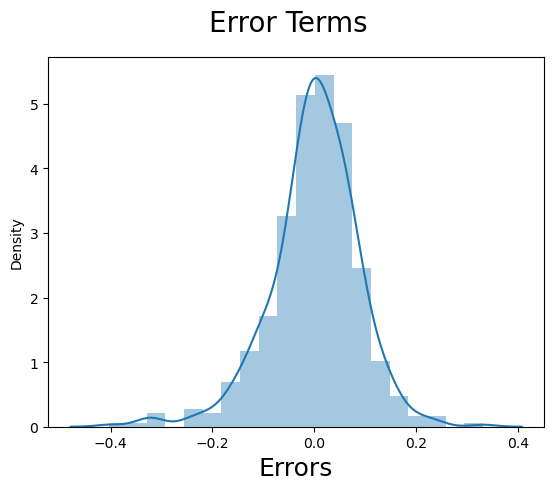

In [70]:
#histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)    

Text(0, 0.5, 'Residuals')

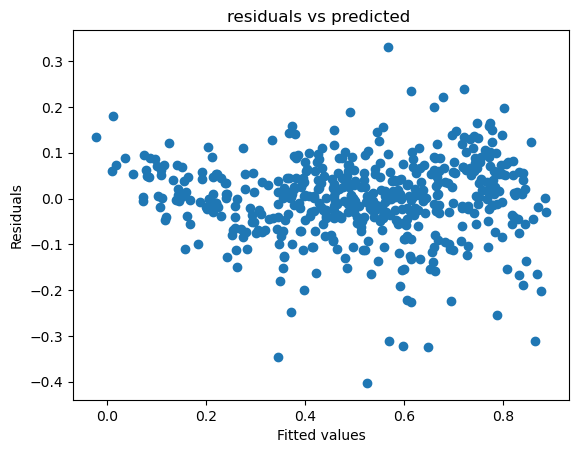

In [71]:
#scatter plot for trend between residuals and values
plt.scatter(y_train_cnt, (y_train-y_train_cnt))
plt.title("residuals vs predicted ")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

## Making predictions

In [72]:
#scaling test dataset.
day_test[var]=scaler.transform(day_test[var])

In [73]:
#Assigning dependent variable
y_test=day_test.pop('cnt')

In [74]:
#Assigning independent variable
X_test=day_test

In [75]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_octo,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [76]:
#create a new dataframe 'X_test_rfe1' with cl1 subset columns
X_test_rfe1 = X_test[col1]

In [77]:
# Add a constant to the test set created
X_test_rfe1 = sm.add_constant(X_test_rfe1)
X_test_rfe1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 16 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   const                                                                                               219 non-null    float64
 1   yr                                                                                                  219 non-null    int64  
 2   holiday                                                                                             219 non-null    int64  
 3   workingday                                                                                          219 non-null    int64  
 4   temp                                                                                                219 non-null   

In [78]:
# Making predictions
y_pred = lm1.predict(X_test_rfe1)

Text(0, 0.5, 'y_pred')

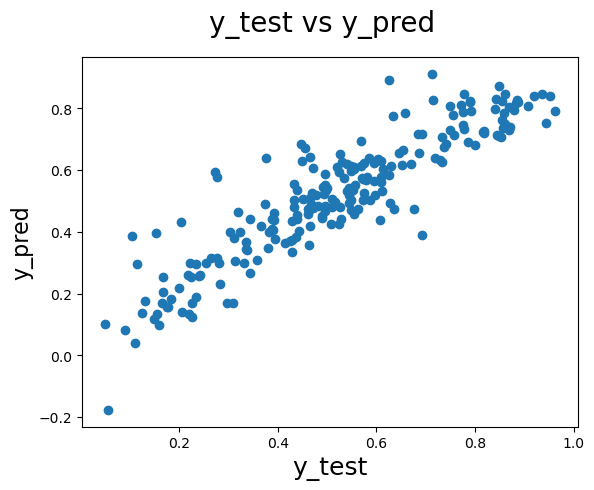

In [79]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [80]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8143237268519432